In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv('spam.csv',encoding='cp1252')


In [3]:
data.drop(columns=[ 'Unnamed: 2',   'Unnamed: 3',   'Unnamed: 4'],inplace=True)

In [4]:
data.rename(columns={'v1':'class','v2':'text'},inplace=True)

In [5]:
data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [7]:
data['class']=encoder.fit_transform(data['class'])

In [8]:
data=data.drop_duplicates(keep='first')

In [9]:
import nltk

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
data['characters_count']= data['text'].apply(len)

In [12]:
data['word_count']= data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [13]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
data['sentence_count']= data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [15]:
import seaborn as sns

<Axes: xlabel='characters_count', ylabel='Count'>

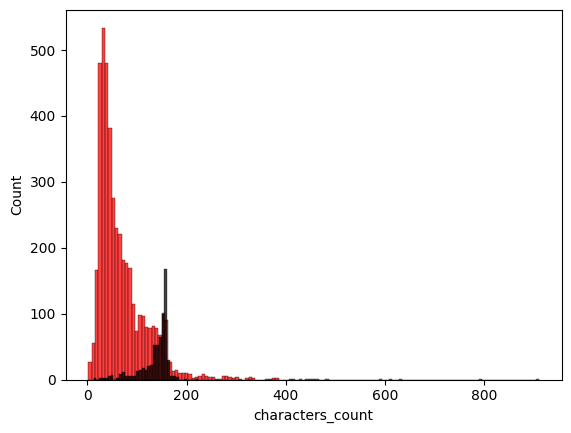

In [16]:
sns.histplot(data[data['class']==0]['characters_count'],color='red')
sns.histplot(data[data['class']==1]['characters_count'],color='black')

<Axes: xlabel='word_count', ylabel='Count'>

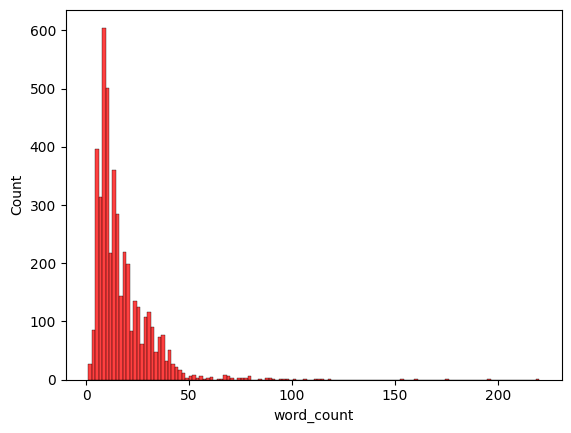

In [17]:
sns.histplot(data[data['class']==0]['word_count'],color='red')

In [18]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('dancing')

'danc'

In [22]:
def text_convert(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    text =y[:]
    y.clear()

    for i in text:
        
        y.append(ps.stem(i))
        
    return " ".join(y)

In [23]:
text_convert('i loved the yt lectures on machine learning. how about you?')

'love yt lectur machin learn'

In [24]:
data['converted_text']=data['text'].apply(text_convert)

In [25]:
from wordcloud import WordCloud
wrd = WordCloud(width=500,height=500,min_font_size=8,background_color='white')

In [26]:
spam_wc=wrd.generate(data[data['class']==1]['converted_text'].str.cat(sep=' '))

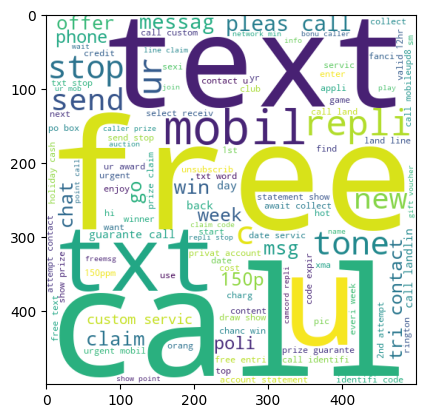

In [27]:
import matplotlib.pyplot as plt
plt.imshow(spam_wc)

In [28]:
spam_text=[]
for i in data[data['class']==1]['converted_text'].tolist():
    for word in i.split():
        spam_text.append(word)

In [29]:
from collections import Counter
pd.DataFrame(Counter(spam_text).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [30]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [31]:
x=tfidf.fit_transform(data['converted_text']).toarray()
x.shape

(5169, 3000)

In [32]:
y=data['class'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [34]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [35]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [36]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))